In [3]:
#Common libraries for work with data
import os.path
import pandas as pd
import numpy as np

#Modelos
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

#Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Funcion para contabilizar nulos
def nulos(df):
    nulls = pd.DataFrame(columns=['column', 'nul_perc'])
    for column in df.columns:
        null_rows = df[column].isnull()
        if null_rows.any() == True:
            nulls= nulls.append({'column': column, 'nul_perc': format(null_rows.sum()/row,"0.2%")}, ignore_index=True)
    return nulls

#Funcion para sustituir nulos con media
def null_mean(df):
    for column in df.columns:
        null_rows = df[column].isnull()
        if null_rows.any() == True:
            df[column] = df[column].fillna(np.mean(df[column])).astype(int) 

In [5]:
df = pd.read_csv('../datos/train_sample.csv')
df.head()

,BuyCard_sum_dsi0,BuyCard_sum_dsi1,BuyCard_sum_dsi2,BuyCard_sum_dsi3,ChangeArena_sum_dsi0,ChangeArena_sum_dsi1,ChangeArena_sum_dsi2,ChangeArena_sum_dsi3,EnterDeck_sum_dsi0,EnterDeck_sum_dsi1,...,hard_negative,hard_positive,id,install_date,platform,site,soft_negative,soft_positive,traffic_type,user_id
0,2,0,0,0,1,0,1,0.0,9,6,...,26.0,22.0,3435577,222,Android,NaN,950.0,1452.0,2,66b3f80690ff
1,0,0,0,0,1,0,0,1.0,6,0,...,95.0,13.0,4074769,270,Android,NaN,480.0,967.0,2,330de16e21d0
2,0,0,0,7,1,1,0,NaN,13,2,...,111.0,19.0,1190847,76,Android,bd22d588,1182.0,1509.0,2,1d9c13e767a2
3,0,0,0,0,1,0,0,NaN,11,7,...,107.0,8.0,5114813,362,Android,NaN,660.0,810.0,2,9d35b8f50698
4,7,0,11,0,2,1,0,0.0,15,8,...,89.0,17.0,1526132,95,Android,NaN,2498.0,2813.0,2,f2e16d56a19e


In [6]:
row, col = df.shape
print(row)
print(col)

548945
102


In [7]:
df_numerical = df.select_dtypes(include = ['float64', 'int64'])
df_numerical.shape

(548945, 82)

In [8]:
df_object = df.select_dtypes(include = ['O'])
df_object.head()

,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,categorical_7,country,device_model,platform,site,user_id
0,FB2Cd102,408BCCd9,A2bEfD7e,94dAb3fC,dd21E110,6cCb423b,42279d35,WW,iQA27X_E,Android,NaN,66b3f80690ff
1,FB2Cd102,408BCCd9,A2bEfD7e,94dAb3fC,dd21E110,6cCb423b,96C52fB6,WW,motorola one vision,Android,NaN,330de16e21d0
2,273c8eEb,8CDd2dbD,B1F91Bb0,2Cbdae4B,bABe1cae,ABDf1BCE,NaN,WW,SM-G950F,Android,bd22d588,1d9c13e767a2
3,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,58fdA94B,Cfc0BEa1,AR,Moto E (4) Plus,Android,NaN,9d35b8f50698
4,FB2Cd102,408BCCd9,A2bEfD7e,94dAb3fC,dd21E110,6cCb423b,42279d35,WW,DUA-L22,Android,NaN,f2e16d56a19e


In [9]:
df['Label'].value_counts()/row

0.0    0.812322
1.0    0.187678
Name: Label, dtype: float64

# **Primer modelo y Feature Importance**

In [10]:
#sustituir null
null_mean(df_numerical)
nulos(df_numerical)

/anaconda3/envs/Prueba/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,column,nul_perc


Divido en train y test

In [11]:
from sklearn.model_selection import train_test_split
y = df_numerical[['Label']]
X = df_numerical.drop(['Label','Label_max_played_dsi'], axis=1).reset_index(drop=True)

print("df_shape",df_numerical.shape)
print("X_shape",X.shape)
print("Y_shape",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)
X_train.head()

print("X_train",X_train.shape)
print("Y_train",y_train.shape)

df_shape (548945, 82)
X_shape (548945, 80)
Y_shape (548945, 1)
X_train (384261, 80)
Y_train (384261, 1)


Construyo el modelo

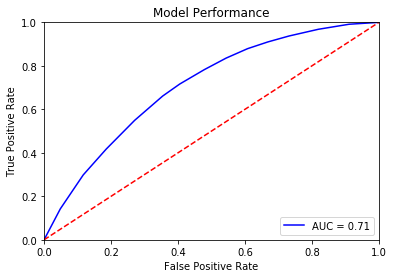

In [12]:
treeclf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=0.05, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=1,
            splitter='best')
treeclf.fit(X_train, y_train)
probs = treeclf.predict_proba(X_test)
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Model Performance')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Obtenco los features mas importantes del modelo

In [13]:
imp_features = pd.DataFrame(columns=['feature', 'importance'])
for importance, name in sorted(zip(treeclf.feature_importances_, X_train.columns),reverse=True):
    imp_features = imp_features.append({'feature':name, 'importance':importance},ignore_index = True)
    
imp_features = imp_features[imp_features['importance'] > 0]
imp_features.sort_values(by='importance',ascending = False)

,feature,importance
0,PiggyBankModifiedPoints_sum_dsi3,0.892866
1,StartSession_sum_dsi3,0.034298
2,soft_positive,0.022819
3,PiggyBankModifiedPoints_sum_dsi2,0.022493
4,WinBattle_sum_dsi3,0.014903
5,StartSession_sum_dsi2,0.010143
6,OpenChest_sum_dsi3,0.002478


**Validacion**

In [14]:
test = pd.read_csv('../datos/evaluation.csv')
test.head() 

,TutorialStart,LoseTournamentBattle_sum_dsi3,categorical_5,WinTournamentBattle_sum_dsi0,EnterDeck_sum_dsi2,BuyCard_sum_dsi3,JoinTournament_sum_dsi2,StartBattle_sum_dsi2,country,BuyCard_sum_dsi2,...,OpenPiggyBank_sum_dsi2,LoseTournamentBattle_sum_dsi1,StartSession_sum_dsi0,WinTournamentBattle_sum_dsi2,categorical_2,OpenChest_sum_dsi1,categorical_3,StartTournamentBattle_sum_dsi0,OpenPiggyBank_sum_dsi0,TutorialStartPart2
0,True,0,3D8Eafc7,0,2,0,0,15,IN,0,...,0,0,2,0,d7172d3e,10,aB5FcAd5,0,0,True
1,True,0,3D8Eafc7,0,6,36,0,17,BR,0,...,0,0,6,0,d7172d3e,7,aB5FcAd5,0,1,True
2,True,0,3D8Eafc7,0,7,0,0,13,RS,0,...,0,0,1,0,d7172d3e,0,aB5FcAd5,0,0,True
3,True,0,3D8Eafc7,0,4,0,0,3,IN,0,...,0,0,5,0,d7172d3e,2,aB5FcAd5,0,0,False
4,True,0,3D8Eafc7,0,3,0,0,2,RU,0,...,0,0,1,0,d7172d3e,5,aB5FcAd5,0,0,True


In [15]:
test.shape

(661313, 100)

selecciono solo variables numericas para aplicar el modelo

In [16]:
test_num = test.select_dtypes(include = ['float64', 'int64'])

In [17]:
#sustituir nulos
null_mean(test_num)
nulos(test_num)

/anaconda3/envs/Prueba/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,column,nul_perc


Hago las predicciones

In [18]:
probs = treeclf.predict_proba(test_num)
probs[:,1]

array([0.28512383, 0.28512383, 0.28512383, ..., 0.28512383, 0.28512383,
       0.28512383])

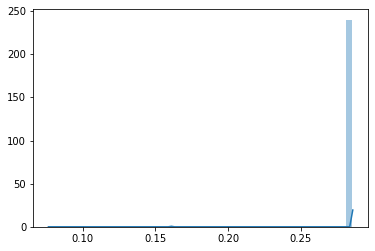

In [19]:
sns.distplot(probs[:,1])

Me predijo todos los registros con la misma probabilidad

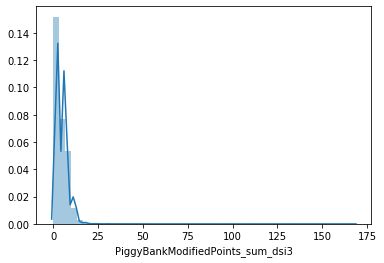

In [20]:
sns.distplot(test['PiggyBankModifiedPoints_sum_dsi3'])

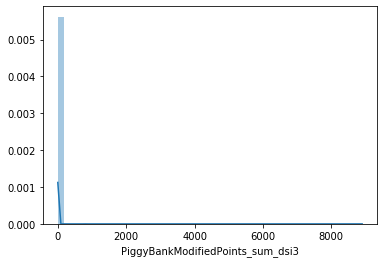

In [21]:
sns.distplot(df['PiggyBankModifiedPoints_sum_dsi3'])

# EDA

**Nulos**

In [30]:
nulls = nulos(df)
nulls

,column,nul_perc
0,ChangeArena_sum_dsi3,19.01%
1,OpenChest_sum_dsi2,13.04%
2,StartBattle_sum_dsi1,8.86%
3,age,97.01%
4,categorical_7,5.69%
5,country,2.13%
6,device_model,0.00%
7,site,73.01%


Descripcion de las variables con nulos

In [31]:
df.loc[:,nulls['column']].describe(include='all')

,ChangeArena_sum_dsi3,OpenChest_sum_dsi2,StartBattle_sum_dsi1,age,categorical_7,country,device_model,site
count,444608.000000,477367.000000,500290.000000,16404.000000,517715,537240,548944,148183
unique,NaN,NaN,NaN,NaN,155,204,17662,499
top,NaN,NaN,NaN,NaN,42279d35,IN,"iPhone7,2",7076a97d
freq,NaN,NaN,NaN,NaN,68863,79510,5569,348
mean,0.225313,3.965310,13.118259,36.909534,NaN,NaN,NaN,NaN
std,0.640074,3.999271,19.398275,15.767479,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,23.000000,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,7.000000,37.000000,NaN,NaN,NaN,NaN
75%,0.000000,6.000000,18.000000,51.000000,NaN,NaN,NaN,NaN


**Varianza de variables numericas**

In [32]:
df_numerical = df.select_dtypes(include = ['float64', 'int64'])
df_numerical.shape

(548945, 82)

A partir de la desviacion estandar que me da el metodo describe, construyo  la varianza

In [33]:
describe_num = df_numerical.describe()
describe_num.loc['var'] = describe_num.loc['std']**2

Selecciono los de menor varianza

In [34]:
nul_var = pd.DataFrame(data=describe_num.loc['var',:]).reset_index()
nul_var = nul_var[nul_var['var'] < 0.1]
nul_var.sort_values(by='var', ascending = True)

,index,var
81,traffic_type,0.000000
45,QuitTournament_sum_dsi3,0.005912
44,QuitTournament_sum_dsi2,0.005952
43,QuitTournament_sum_dsi1,0.006157
18,JoinTournament_sum_dsi2,0.006320
17,JoinTournament_sum_dsi1,0.006855
19,JoinTournament_sum_dsi3,0.007103
42,QuitTournament_sum_dsi0,0.007266
16,JoinTournament_sum_dsi0,0.007309
26,LoseTournamentBattle_sum_dsi0,0.016014


In [35]:
nul_var.shape

(20, 2)

*Varianza de los features mas importantes*

In [36]:
describe_num.loc['var',imp_features['feature']] = describe_num.loc['std',imp_features['feature']]**2
pd.DataFrame(data=describe_num.loc['var',imp_features['feature']]).reset_index()

,index,var
0,PiggyBankModifiedPoints_sum_dsi3,1.620513e+02
1,StartSession_sum_dsi3,1.500884e+01
2,soft_positive,1.156919e+08
3,PiggyBankModifiedPoints_sum_dsi2,8.950182e+01
4,WinBattle_sum_dsi3,4.643526e+01
5,StartSession_sum_dsi2,1.819293e+01
6,OpenChest_sum_dsi3,6.201113e+09


**Varianza de variables alfanumericas**

*Que porcentaje de los registros de las variables categoricas toman el valor de la moda*

In [37]:
df_object = df.select_dtypes(include = ['O'])
df_object.head()

,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,categorical_7,country,device_model,platform,site,user_id
0,FB2Cd102,408BCCd9,A2bEfD7e,94dAb3fC,dd21E110,6cCb423b,42279d35,WW,iQA27X_E,Android,NaN,66b3f80690ff
1,FB2Cd102,408BCCd9,A2bEfD7e,94dAb3fC,dd21E110,6cCb423b,96C52fB6,WW,motorola one vision,Android,NaN,330de16e21d0
2,273c8eEb,8CDd2dbD,B1F91Bb0,2Cbdae4B,bABe1cae,ABDf1BCE,NaN,WW,SM-G950F,Android,bd22d588,1d9c13e767a2
3,67AD0B6E,d7172d3e,aB5FcAd5,94dAb3fC,3D8Eafc7,58fdA94B,Cfc0BEa1,AR,Moto E (4) Plus,Android,NaN,9d35b8f50698
4,FB2Cd102,408BCCd9,A2bEfD7e,94dAb3fC,dd21E110,6cCb423b,42279d35,WW,DUA-L22,Android,NaN,f2e16d56a19e


In [38]:
describe_cat = df_object.describe()

Calculo que porcentaje de los registros estan concentrados en la categoria principal

In [39]:
d = {'var':describe_cat.loc['freq',:]/describe_cat.loc['count',:], 'top':describe_cat.loc['top',:], 
     'unique': [len(df_object[x].unique()) for x in df_object.columns]}
pd.DataFrame(data=d).sort_values(by=['var'], ascending = False)

,var,top,unique
categorical_4,0.919312,94dAb3fC,2127
platform,0.887541,Android,2
categorical_3,0.876804,aB5FcAd5,937
categorical_5,0.871905,3D8Eafc7,4074
categorical_1,0.858977,67AD0B6E,23
categorical_2,0.858977,d7172d3e,524
categorical_6,0.858977,58fdA94B,9
country,0.147997,IN,205
categorical_7,0.133013,42279d35,156
device_model,0.0101449,"iPhone7,2",17663


**Duplicados**

In [40]:
df['user_id'].duplicated().any()

False

**Outliers**

Utilizo la definicion de outliers de tukey para detectar cuales registros son outliers en cada variable numerica y cual es el porcentaje de outliers que tiene cada variable

In [41]:
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

In [42]:
outliers = pd.DataFrame(columns=['column', 'outliers_perc'])
for x in df_numerical.columns:
    outliers = outliers.append({'column':x, 
                                 'outliers_perc': tukey_outliers(df_numerical,x,extreme=False).shape[0]/row}
                                , ignore_index = True)


Variables con mas de 10% de outliers

In [43]:
outliers[outliers['outliers_perc'] > 0.1]

,column,outliers_perc
0,BuyCard_sum_dsi0,0.187840
1,BuyCard_sum_dsi1,0.172746
2,BuyCard_sum_dsi2,0.235503
3,BuyCard_sum_dsi3,0.232701
4,ChangeArena_sum_dsi0,0.282567
6,ChangeArena_sum_dsi2,0.182346
20,Label,0.187678
34,OpenPiggyBank_sum_dsi0,0.160038
76,hard_positive,0.202694


*Outliers de los features mas importantes*

In [44]:
outliers = pd.DataFrame(columns=['column', 'outliers_perc'])
for x in imp_features['feature']:
    outliers = outliers.append({'column':x, 
                                 'outliers_perc': tukey_outliers(df_numerical,x,extreme=False).shape[0]/row}
                                , ignore_index = True)
outliers

,column,outliers_perc
0,PiggyBankModifiedPoints_sum_dsi3,0.017619
1,StartSession_sum_dsi3,0.071182
2,soft_positive,0.035596
3,PiggyBankModifiedPoints_sum_dsi2,0.007489
4,WinBattle_sum_dsi3,0.083323
5,StartSession_sum_dsi2,0.043237
6,OpenChest_sum_dsi3,0.018326


**Analisis univariante**

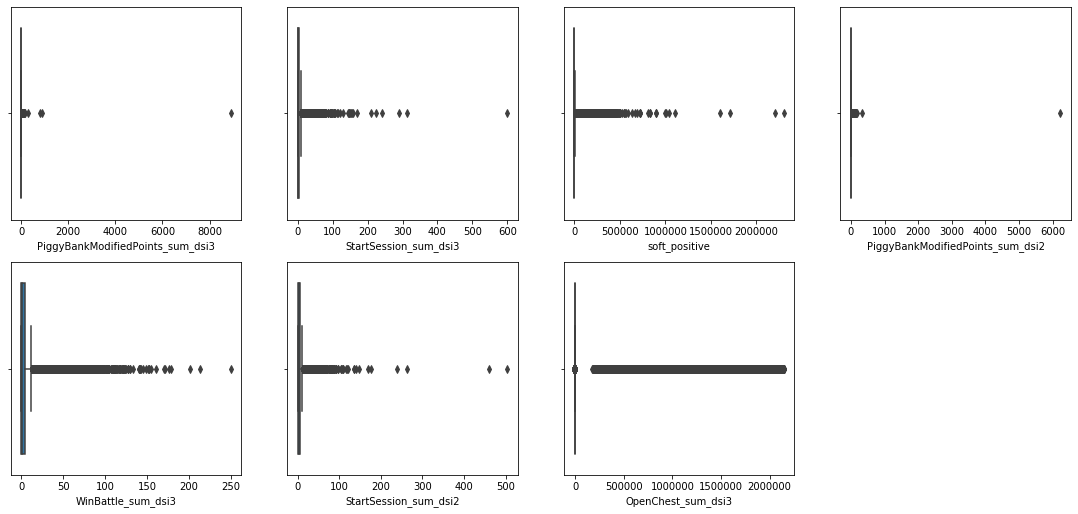

In [45]:
plt.figure(figsize=(19,18))
i = 1
for x in imp_features['feature']:
    plt.subplot(4,4,i)
    sns.boxplot(df[x])
    i += 1
plt.show()

**Correlacion entre variables**

In [46]:
var = imp_features['feature'].tolist()
var.append('Label')
var

['PiggyBankModifiedPoints_sum_dsi3',
 'StartSession_sum_dsi3',
 'soft_positive',
 'PiggyBankModifiedPoints_sum_dsi2',
 'WinBattle_sum_dsi3',
 'StartSession_sum_dsi2',
 'OpenChest_sum_dsi3',
 'Label']

In [47]:
df_corr=df_numerical.loc[:,var].corr()["Label"]
df_corr


PiggyBankModifiedPoints_sum_dsi3   -0.075242
StartSession_sum_dsi3              -0.155624
soft_positive                      -0.031347
PiggyBankModifiedPoints_sum_dsi2   -0.076077
WinBattle_sum_dsi3                 -0.172128
StartSession_sum_dsi2              -0.124504
OpenChest_sum_dsi3                 -0.000235
Label                               1.000000
Name: Label, dtype: float64

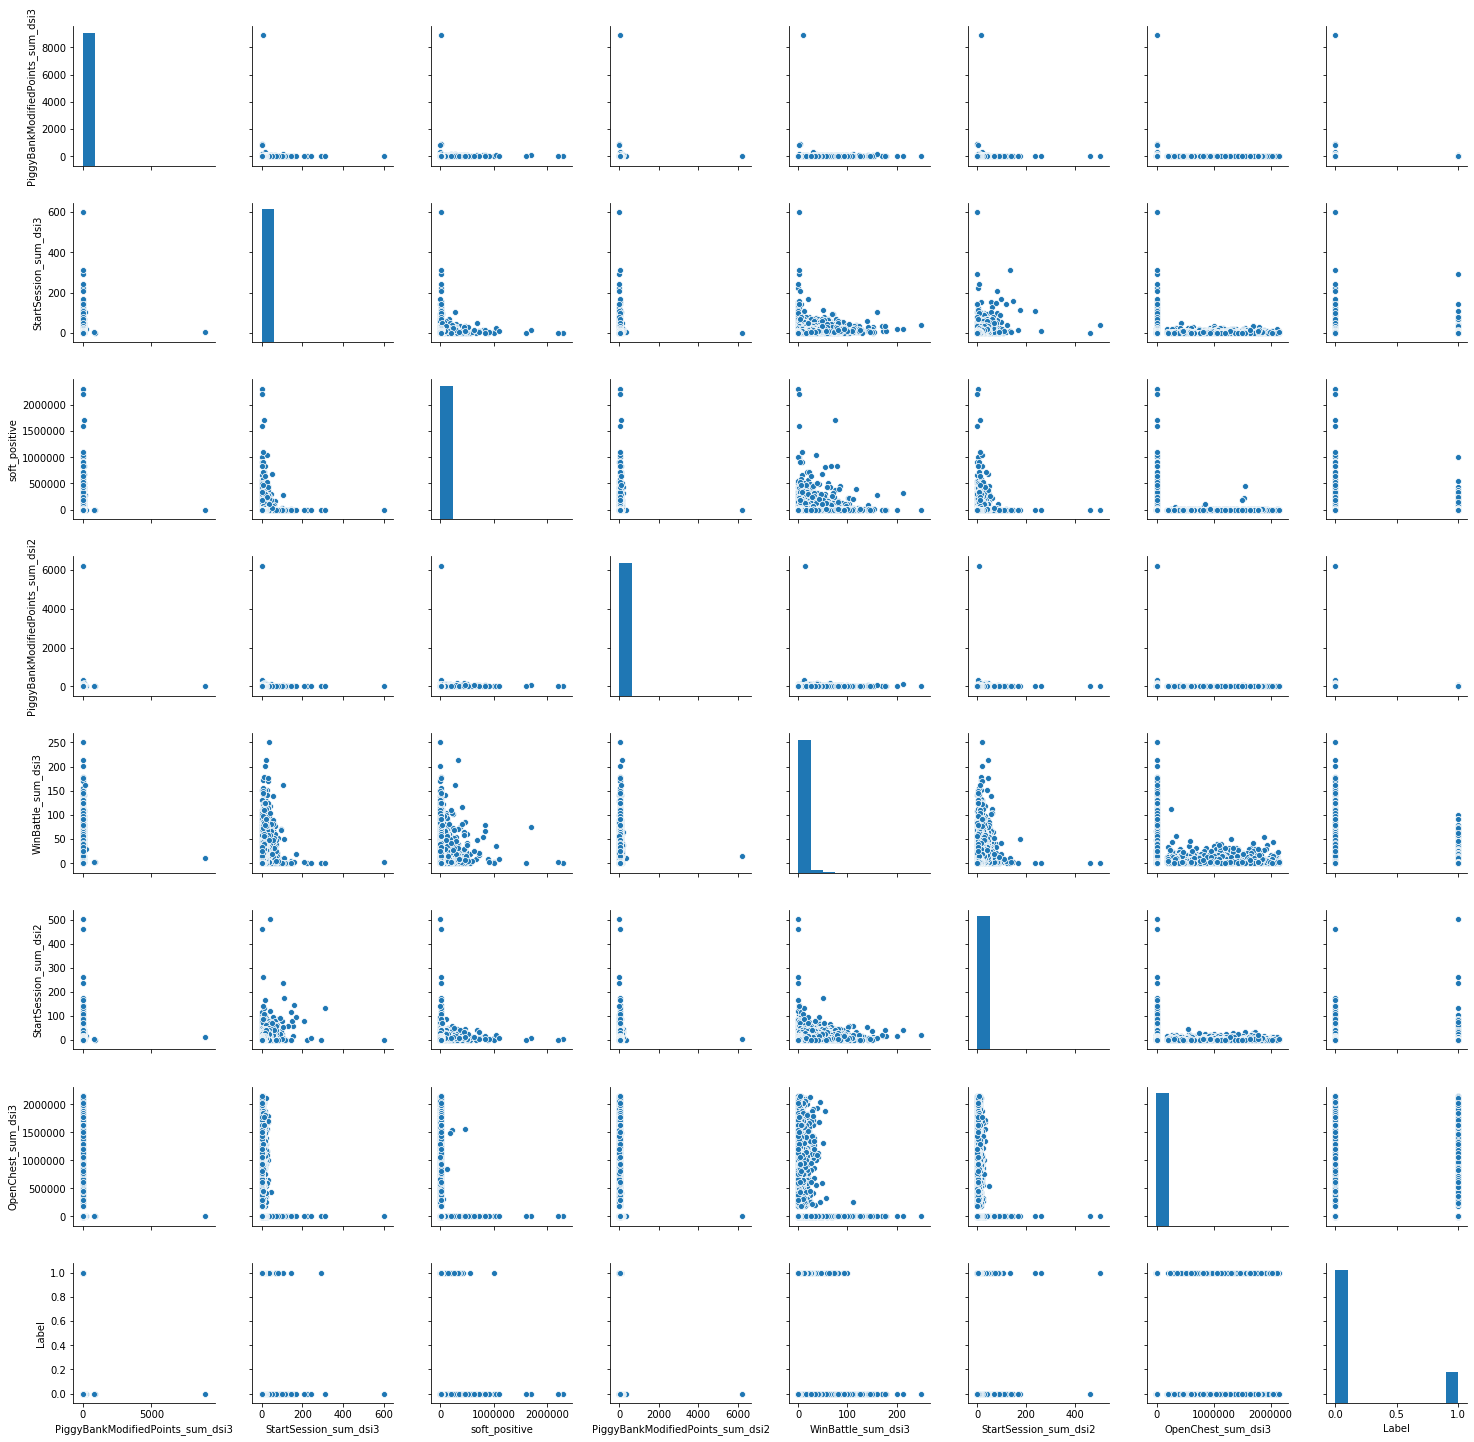

In [318]:
sns.pairplot(df_numerical.loc[:,df_corr.index])

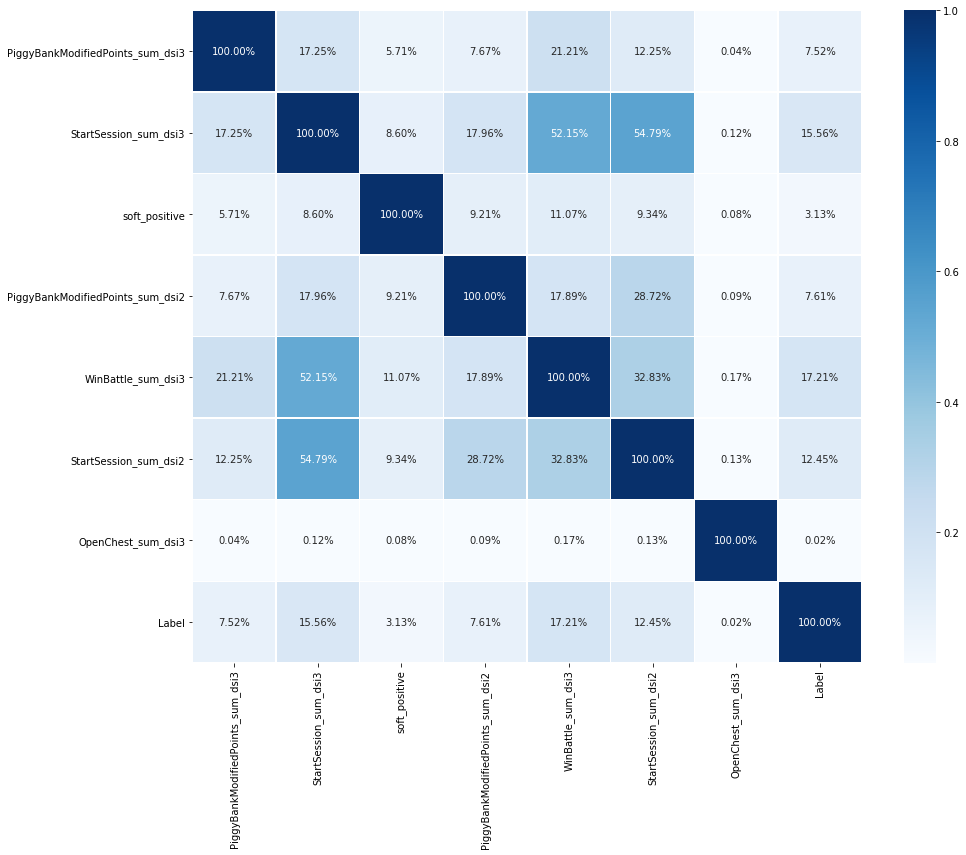

In [48]:
plt.rcParams["figure.figsize"]=(15,12)
sns.heatmap(df_numerical.loc[:,var].corr().abs(), annot=True, linewidths=0.5, cmap="Blues", fmt="0.2%")

# Algunos gráficos

**Gráficos tutoriales vs churn**

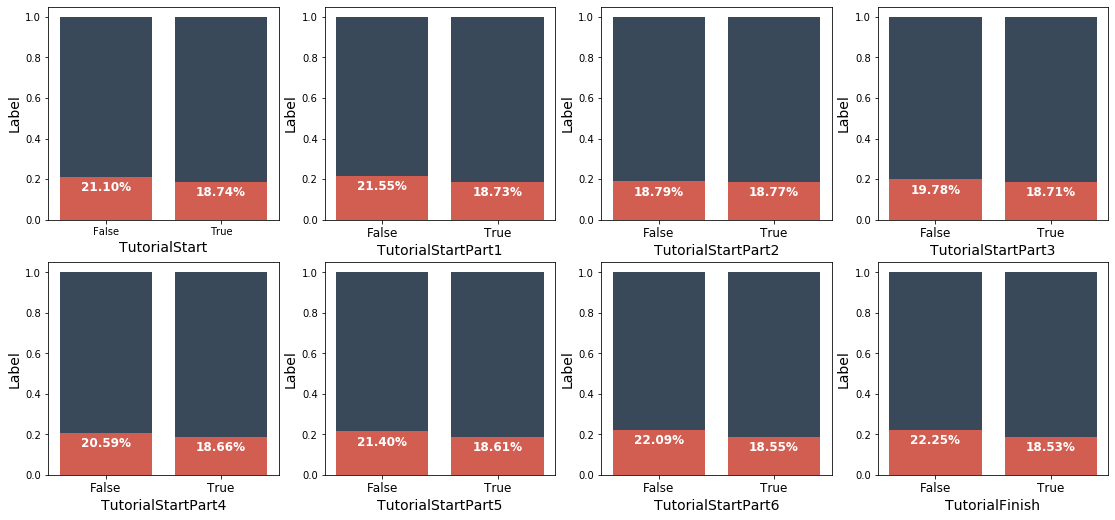

In [49]:
tutorial = ["TutorialStart","TutorialStartPart1","TutorialStartPart2",
            "TutorialStartPart3","TutorialStartPart4","TutorialStartPart5",
            "TutorialStartPart6","TutorialFinish"] #Creo lista con las variables que me interesan
i = 1
plt.figure(figsize=(19,18)) #tamaño de la figura

for x in tutorial:
    plt.subplot(4,4,i)
    agrupado = df.groupby([x]) #agrupo el data set por la variable de tutorial
    df_agg = agrupado[['Label']].mean() #obtengo % de churn dependiendo si completo o no el tutorial

    #tamaño y tipo de las etiquetas del grafico
    plt.xlabel(x, fontsize=14)
    plt.ylabel('Label', fontsize=14)
    plt.rcParams['xtick.labelsize'] = 12
    
    sns.barplot(x = df_agg.index, y = [1,1], color = "#34495e") #primer grafico pone todas las barras en 100%
    splot = sns.barplot(x = df_agg.index, y = df_agg.Label, color = "#e74c3c") #grafica el porcentaje de churn
    
    #anotaciones para dibujar en el grafico el % de churn de cada categoria
    for p in splot.patches[2:5]:
        splot.annotate(format(p.get_height(), '0.2%'), (p.get_x() + p.get_width() / 2., p.get_height()-0.1), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',c = '#ffffff'
                       ,fontweight = 'bold', fontsize = 12)
    i += 1
plt.show()

**Churn por pais**

In [50]:
#agrupo el dataset por pais y me quedo con los 15 principales
countries = df['country'].value_counts().sort_values(ascending = False)
countries = df[df.country.isin(countries.head(15).index)]
agrupado = countries.groupby(['country'])
df_agg = agrupado[['Label']].mean()
df_agg['count'] = agrupado[['Label']].count()
df_agg

,Label,count
country,,
AR,0.206512,14619
BR,0.207669,32990
DE,0.135880,14189
EG,0.206775,13285
ES,0.154740,10327
FR,0.153450,11639
IN,0.191599,79510
IT,0.153201,10966
KR,0.173654,12427


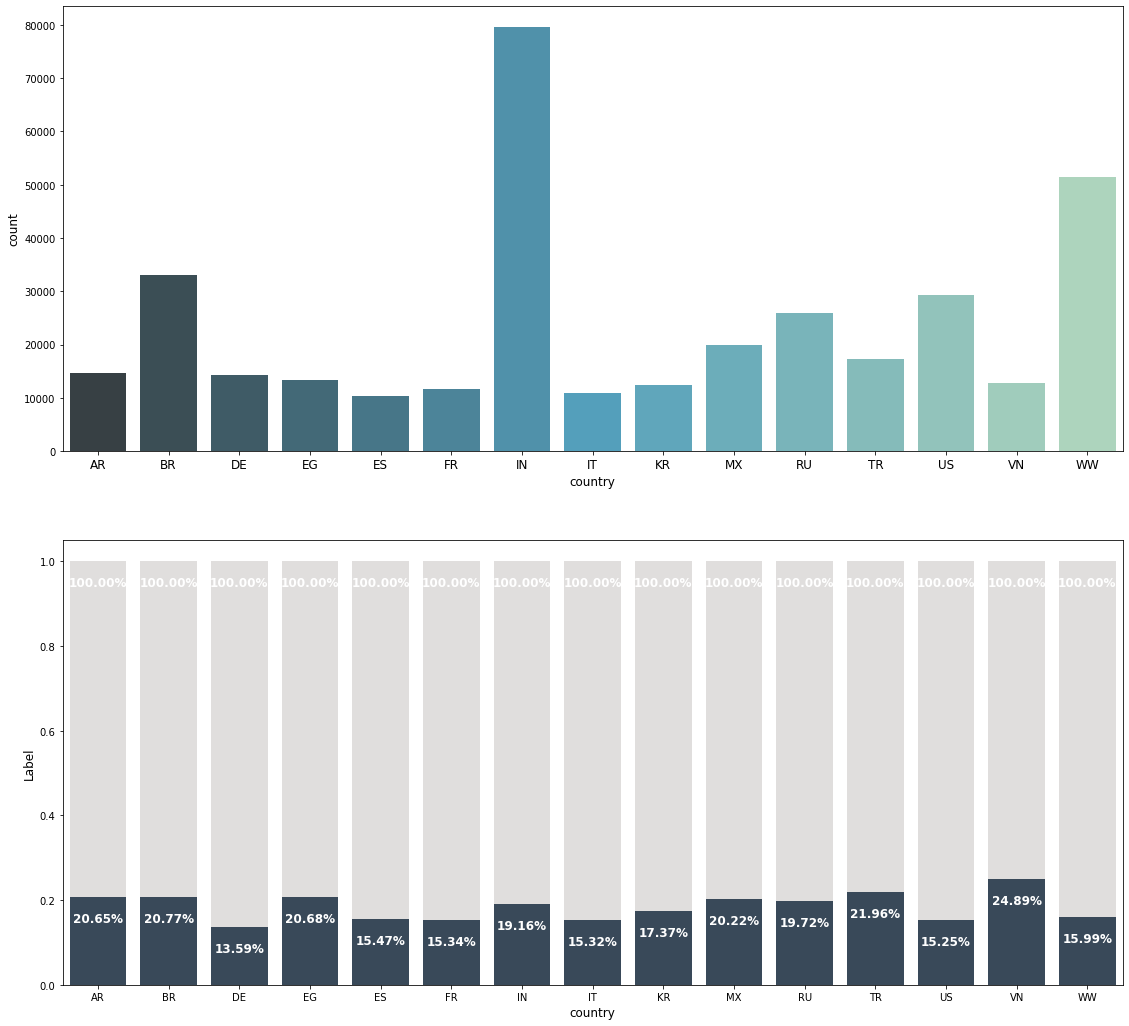

In [51]:
plt.figure(figsize=(19,18))

plt.subplot(2,1,1) #grafico de arriba
plt.xlabel(i, fontsize=12)
plt.ylabel('Registros', fontsize=12)
plt.rcParams['xtick.labelsize'] = 10 
    
sns.barplot(x = df_agg.index, y = df_agg['count'],   palette="GnBu_d") #grafico distribucion de paises


plt.subplot(2,1,2) #me muevo al grafico de abajo
plt.xlabel(i, fontsize=12)
plt.ylabel('Registros', fontsize=12)
plt.rcParams['xtick.labelsize'] = 10 
sns.barplot(x = df_agg.index, y = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], color = "#e0dedc") #grafico todo en 100% para crear barra apilada
splot = sns.barplot(x = df_agg.index, y = df_agg.Label, color = "#34495e") #grafico % de churn de cada pais

#anotaiones para dibujar el % de churn en el grafico
for p in splot.patches:
    splot.annotate(format(p.get_height(), '0.2%'), (p.get_x() + p.get_width() / 2., p.get_height()-0.075), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',c = '#ffffff'
                  ,fontweight = 'bold', fontsize=12)

**Grafico de principales variables categoricas**

In [52]:
def tratar_nulos_categoricos(df):
    # Crea etiquetas nuevas para las variables categoricas a las que vale la pena hacerlo
    values = {'categorical_7': 'sin_cat7', 'country': 'sin_country', 'site': 'sin_public'}
    df = df.fillna(value=values)

    # Elimina nulls considerados outliers
    df.dropna(subset=['device_model'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

df = tratar_nulos_categoricos(df)

device_model
Cantidad de etiquetas distintas: 17662
platform
Cantidad de etiquetas distintas: 2
site
Cantidad de etiquetas distintas: 500


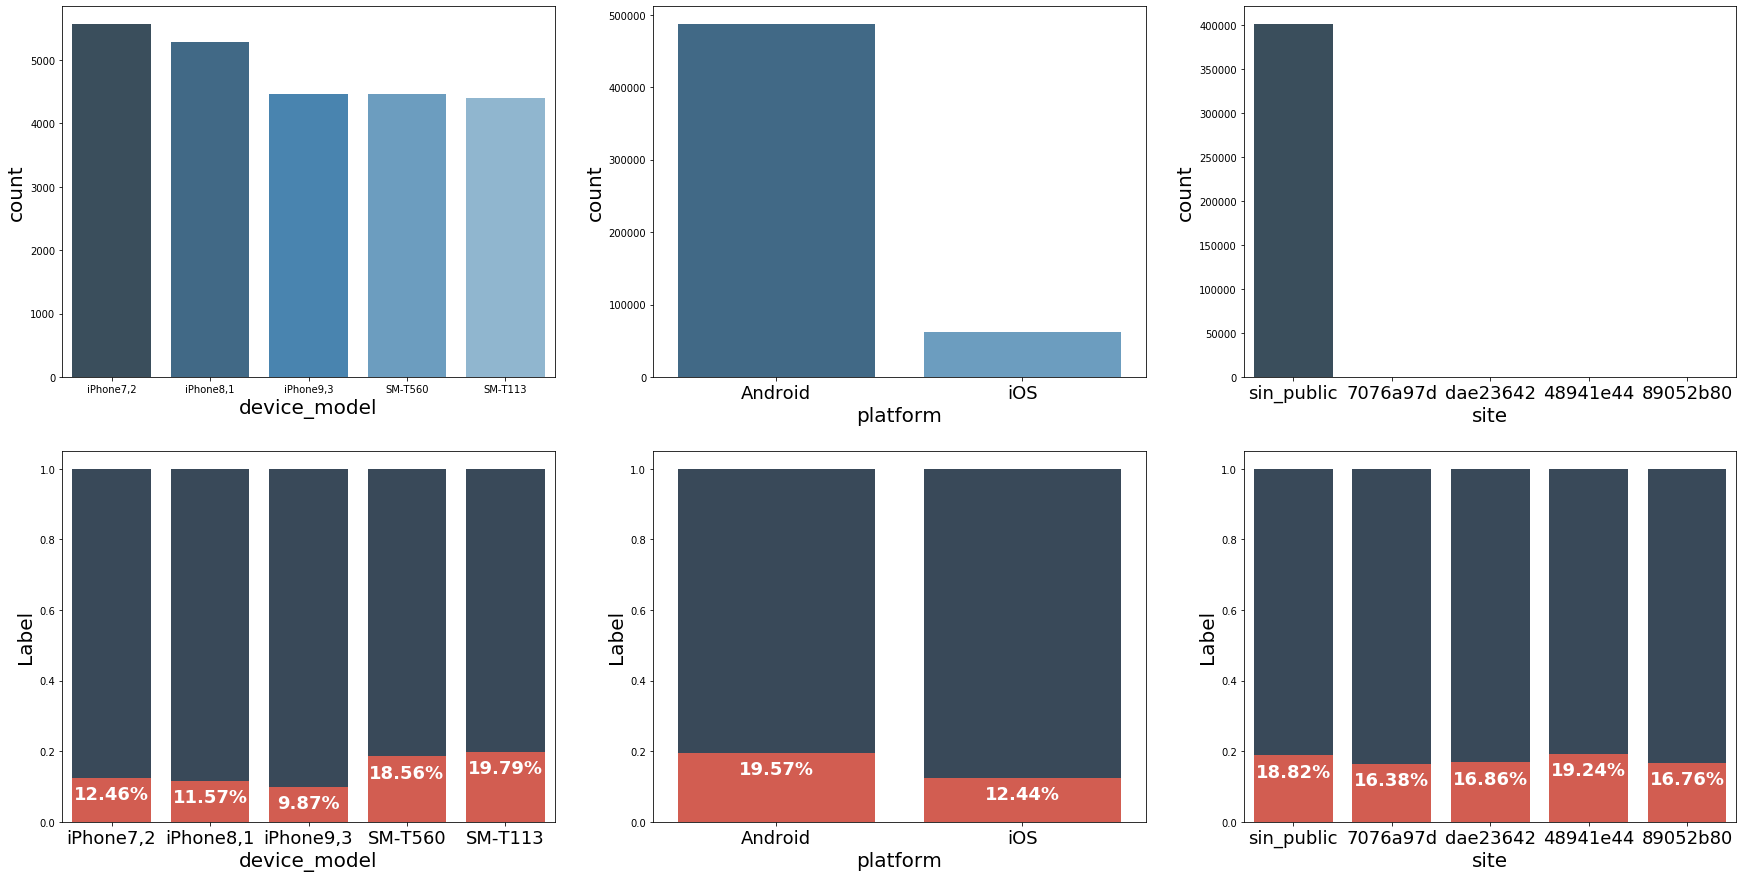

In [53]:
f, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=False, sharey=False) #tamano de la figura
x = 1 #itera sobre los subgraficos


for i in ['device_model','platform','site']: #listo las variables que me intereesan
    print(i)
    
    #agrupo el dataset por la variable y obtengo porcentaje de churn de cada categoria
    
    agrupado = df.groupby([i])
    df_agg = agrupado[['Label']].mean()
    df_agg['count'] = agrupado[['Label']].count()

    df_agg = df_agg.sort_values(by=['count'], ascending=False)

    #me posiciono en el primer subgrafico
    plt.subplot(2,3,x)
    #le agrego estilo a los labels
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Registros', fontsize=20)
    plt.rcParams['xtick.labelsize'] = 18 
    
    #primer grafico la distribucion de las categorias de la variable
    sns.barplot(data=df_agg.head(5), x=df_agg.head(5).index, y='count', palette = "Blues_d")
    print('Cantidad de etiquetas distintas: '+str(len(df_agg.index)))
    
    #me posiciono en el grafico de abajo
    plt.subplot(2,3,x+3)
    plt.xlabel(i, fontsize=20)
    plt.ylabel('Registros', fontsize=20)
    plt.rcParams['xtick.labelsize'] = 18 
    
    #creo una lista de 1 para hacer el grafico apilado
    cat= []
    for y in df_agg.head(5).index:
        cat.append(1)
    
    #grafico apilado de porcentaje de churn por categoria
    sns.barplot(data=df_agg.head(5), x=df_agg.head(5).index, y=cat, color = "#34495e")
    splot = sns.barplot(data=df_agg.head(5), x=df_agg.head(5).index, y='Label', color =  "#e74c3c" )
    x +=1
    
    #anotaciones
    for p in splot.patches[len(df_agg.head(5).index) : len(df_agg.head(5).index)*2]:
        splot.annotate(format(p.get_height(), '0.2%'), (p.get_x() + p.get_width() / 2., p.get_height()-0.075), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',c = '#ffffff'
                  ,fontweight = 'bold', fontsize = 18)

**WinBattle**

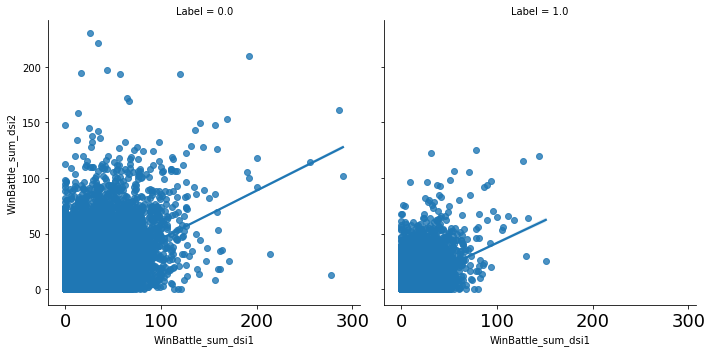

In [54]:
sns.lmplot(x="WinBattle_sum_dsi1", y="WinBattle_sum_dsi2", col="Label",
           data=df, palette = "RdBu")

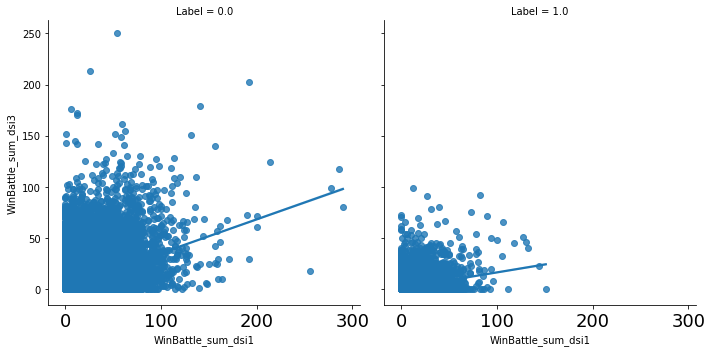

In [55]:
sns.lmplot(x="WinBattle_sum_dsi1", y="WinBattle_sum_dsi3", col="Label",
           data=df, palette = "RdBu")